In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import matplotlib
import pathlib
matplotlib.use('Qt5Agg')

In [4]:
import sys
sys.path.append("/home/donaf-strange/LAB_WORK/eeg_arithmetic_project/src")


In [9]:
from preprocessing import load_and_preprocess_edf
raw = load_and_preprocess_edf("/home/donaf-strange/LAB_WORK/eeg_arithmetic_project/data/files/Subject00_2.edf")

Extracting EDF parameters from /home/donaf-strange/LAB_WORK/eeg_arithmetic_project/data/files/Subject00_2.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 30999  =      0.000 ...    61.998 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 1651 samples (3.302 s)



EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


In [10]:
raw.plot()

<MNEBrowseFigure size 800x800 with 4 Axes>

Channels marked as bad:
none


Created an SSP operator (subspace dimension = 1)
1 projection items activated
SSP projectors applied...
Not setting metadata
361 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 1)
1 projection items activated
Using data from preloaded Raw for 361 events and 1000 original time points ...
0 bad epochs dropped


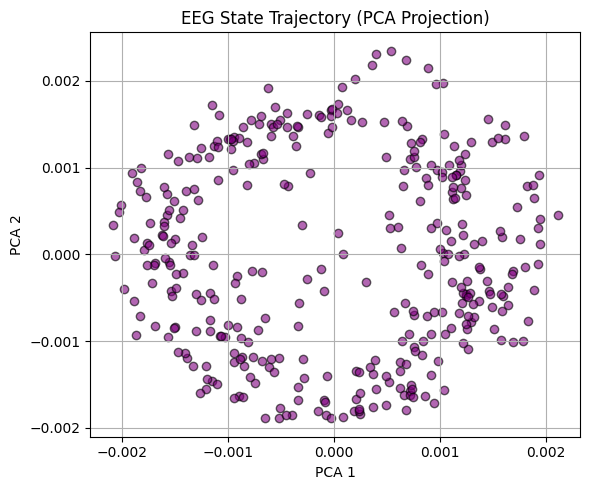

In [35]:
from preprocessing import load_and_preprocess_edf
from features import extract_state_space

# Apply average reference
raw.apply_proj()

# Extract state space (2D PCA)
states = extract_state_space(raw, window_size=2.0, step_size=0.5, n_components=2)

# Visualize
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 5))
plt.scatter(states[:, 0], states[:, 1], alpha=0.6, c='purple', edgecolor='k')
plt.title("EEG State Trajectory (PCA Projection)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.grid(True)
plt.tight_layout()
plt.show()

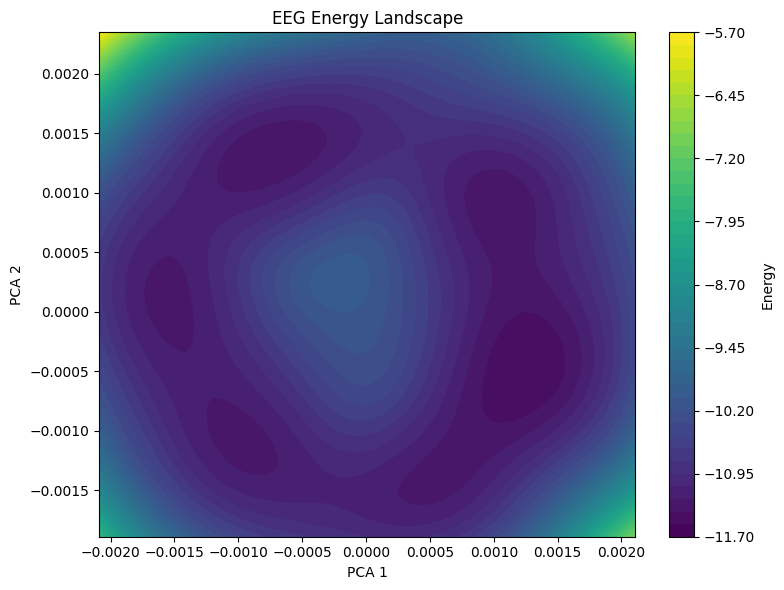

In [36]:
from landscape import compute_energy_landscape
X, Y, energy = compute_energy_landscape(states)

# Step 2: Plot energy surface
plt.figure(figsize=(8, 6))
contour = plt.contourf(X, Y, energy, levels=50, cmap="viridis")
plt.colorbar(contour, label="Energy")
plt.title("EEG Energy Landscape")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.tight_layout()
plt.show()

In [37]:
from landscape import energy_entropy
H = energy_entropy(energy)
print(f"Energy entropy: {H:.4f}")

Energy entropy: 9.0724


In [38]:
from landscape import compute_energy_landscape, count_energy_wells

X, Y, energy = compute_energy_landscape(states)
n_wells, wells_mask = count_energy_wells(energy)

print("Number of attractor wells:", n_wells)

Number of attractor wells: 5


In [41]:
#something happeneing

# here comes the next Procidure

In [15]:
!pip install --upgrade numpy

  Using cached numpy-2.3.1-cp312-cp312-manylinux_2_28_x86_64.whl.metadata (62 kB)
Using cached numpy-2.3.1-cp312-cp312-manylinux_2_28_x86_64.whl (16.6 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tvb-library 2.9 requires mako>=1.1.4, which is not installed.
nidmresults 2.1.0 requires rdflib-jsonld, which is not installed.
spectrum 0.8.1 requires easydev, which is not installed.
fsl-mrs 2.3.1 requires dask-core, which is not installed.
neuron 8.2.6 requires numpy<2,>=1.9.3, but you have numpy 2.3.1 which is incompatible.
scipy 1.14.1 requires numpy<2.3,>=1.23.5, but you have numpy 2.3.1 which is incompatible.
numba 0.60.0 requires numpy<2.1,>=1.22, but you have numpy 2.3.1 which is incompatible.
mediapipe 0

In [16]:
import pickle
import mne

# Load EEG data for participant '34'
with open('/home/donaf-strange/LAB_WORK/eeg_arithmetic_project/data/all_rest_eeg_by_participant.pkl', 'rb') as f:
    rest_eeg_dict = pickle.load(f)

raw = rest_eeg_dict['34']

# Set average reference
raw.set_eeg_reference('average', verbose=False)

# Bandpass filter: typically 1–40 Hz for state dynamics
raw.filter(0.5, 40., fir_design='firwin')

# OPTIONAL: plot to visually inspect
raw.plot(n_channels=23, scalings='auto', title='Participant 34 - Resting EEG')


ModuleNotFoundError: No module named 'numpy._core.multiarray'